In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

Traceback (most recent call last):
  File "c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py", line 467, in _make_request
    self._validate_conn(conn)
  File "c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py", line 1092, in _validate_conn
    conn.connect()
  File "c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py", line 642, in connect
    sock_and_verified = _ssl_wrap_socket_and_match_hostname(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connection.py", line 783, in _ssl_wrap_socket_and_match_hostname
    ssl_sock = ssl_wrap_socket(
               ^^^^^^^^^^^^^^^^
  File "c:\Users\maxim\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\util\ssl_.py", line 469, in ssl_wrap_socket
    ssl_sock = _ssl_wrap_socket_impl(sock, 

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 220.2 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 219.4 kB/s eta 0:00:03
   ---- ---------------------------------- 71.7/626.3 kB 328.6 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 568.9 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/626.3 kB 765.3 kB/s eta 0:00:01
   ------------------ ------------------- 307.2/626.3 kB 905.4 kB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 1.0 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1.4 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv',
                 header=None, index_col = 0)
df.head()

URLError: <urlopen error [WinError 10060] Попытка установить соединение была безуспешной, т.к. от другого компьютера за требуемое время не получен нужный отклик, или было разорвано уже установленное соединение из-за неверного отклика уже подключенного компьютера>

In [ ]:
df = df[[2,3]].reset_index(drop=True)

In [ ]:
df

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.columns = ['sentiment', 'text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)
# df = df[df['text'].apply(len)]

In [ ]:
sum(df['text'].apply(len) > 5), sum(df['text'].apply(len) <= 5)

(72883, 2113)

In [ ]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [ ]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

**Preprocessing preprocess_kgptalkie**

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-vkpwh144
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-vkpwh144
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7603 sha256=986daae0f240e798ab047e6313a26a21f4d5c5d7940bb7203e5171d694b6b5d1
  Stored in directory: /tmp/pip-ephem-wheel-cache-pnu2xv2d/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

df.columns

Index(['sentiment', 'text'], dtype='object')

In [ ]:
df = ps.get_basic_features(df)

In [ ]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

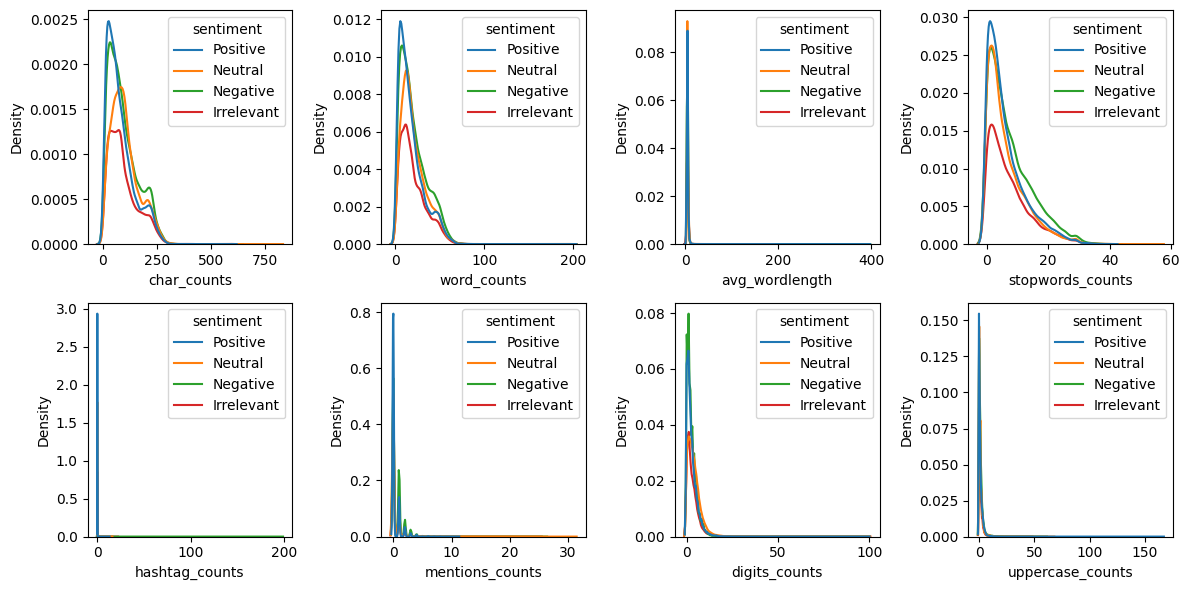

In [ ]:
df.head()

# hashtag, @mention, 123, UPPER

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
  plt.subplot(2, 4, index + 1)
  sns.kdeplot(data=df, x=col, hue="sentiment", fill=False)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

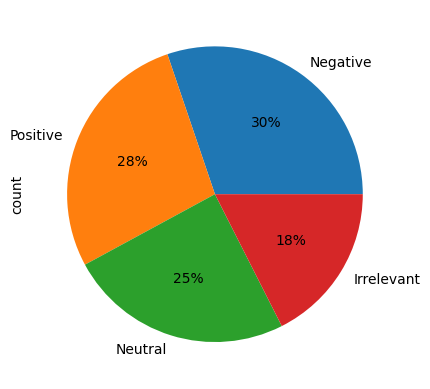

In [ ]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [ ]:
## Wordcloud visualization
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [ ]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

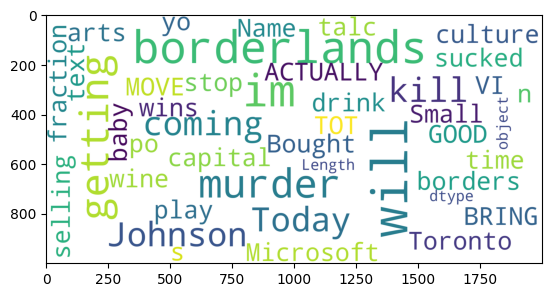

In [ ]:
wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                      max_words=300, max_font_size=40, scale=5).generate(str(df['text']))

plt.imshow(wordcloud)

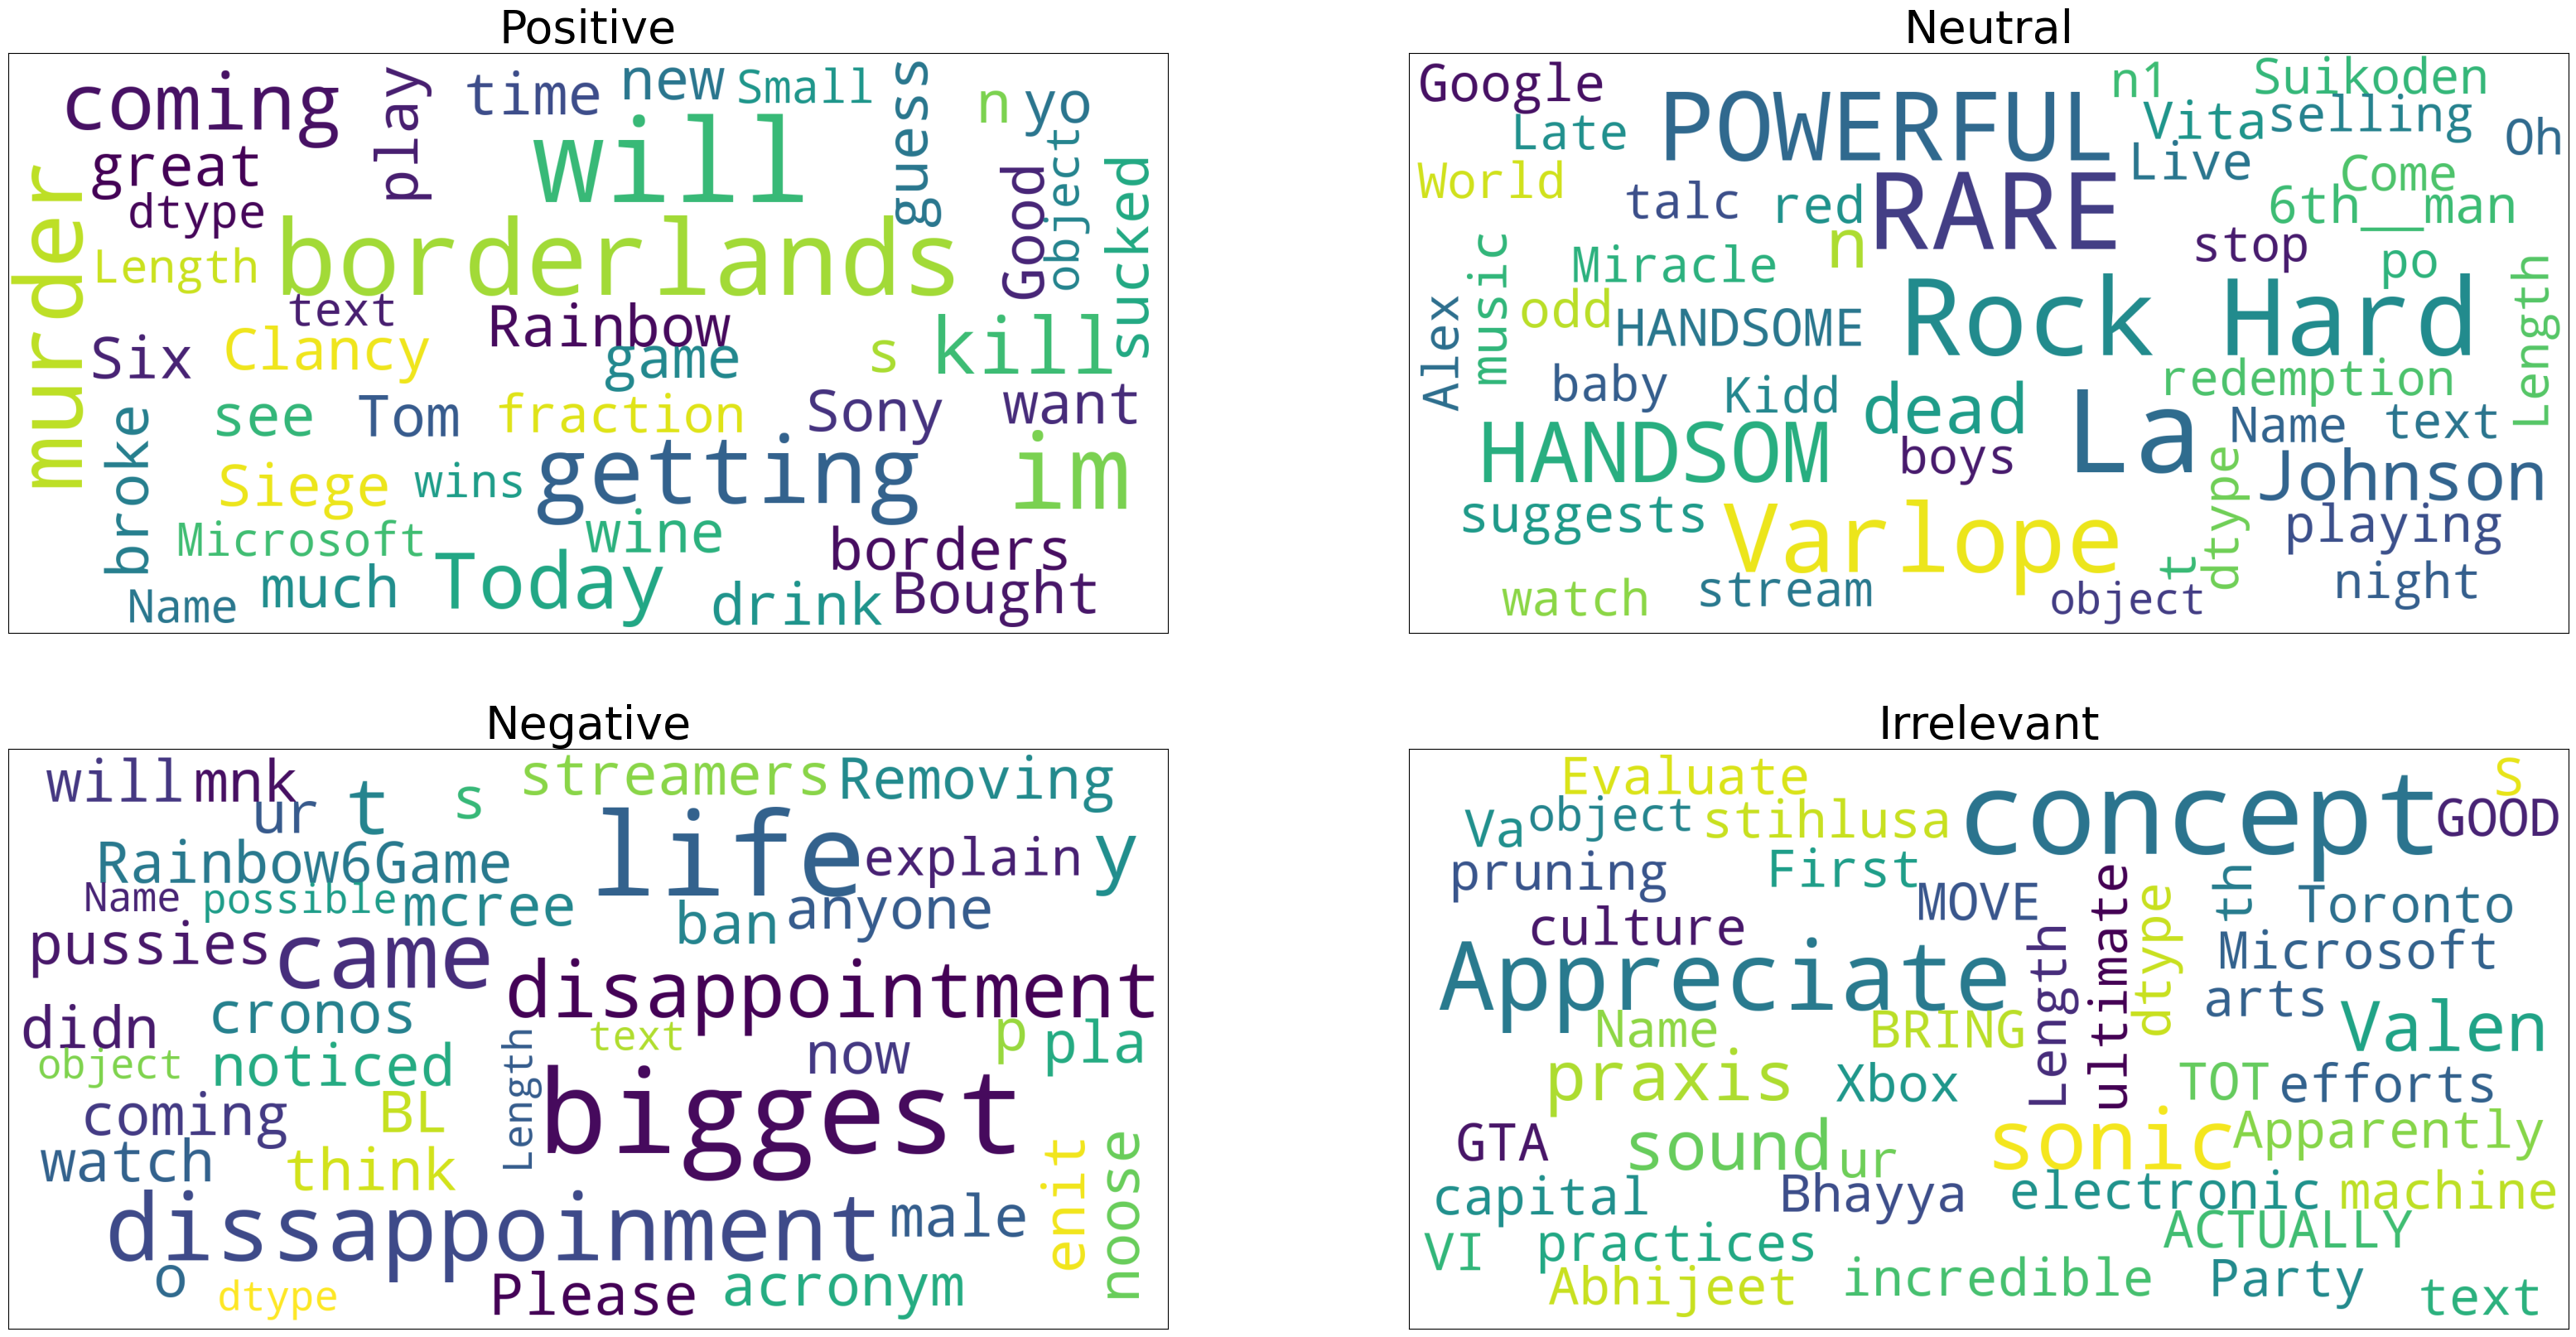

In [ ]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
  plt.subplot(2,2, index+1)

  data = df[df['sentiment']==sent]['text']
  wordcloud = WordCloud(background_color='white', stopwords=stopwords,
                      max_words=300, max_font_size=40, scale=5).generate(str(data))
  plt.imshow(wordcloud)
  plt.xticks([])
  plt.yticks([])
  plt.title(sent, fontsize=40)


**Data Cleaning**

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))


In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],
                                           df['sentiment'],
                                           test_size=0.2,
                                           random_state=0)

In [ ]:
X_train.shape, X_test.shape

((58306,), (14577,))

Model Building and Testing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [ ]:
#evaluation
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.91      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [ ]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [ ]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [ ]:
clf.predict(['I am really glad to see you'])

array(['Positive'], dtype=object)

In [ ]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [ ]:
clf.predict(['i have done nothing but play borderland'])

array(['Positive'], dtype=object)